In [2]:
from lstar_extraction.LSTM import LSTMNetwork
# from GRU import GRUNetwork
from lstar_extraction.RNNClassifier import RNNClassifier
from lstar_extraction.Training_Functions import mixed_curriculum_train,make_train_set_for_target,make_test_set
from lstar_extraction.Tomita_Grammars import tomita_1, tomita_2, tomita_3, tomita_4, tomita_5, tomita_6, tomita_7


# auxiliary function
def to_trace(example,length_alphabet, char_to_int):
    integer_encoded = [char_to_int[char] for char in example]
    # one hot encode
    onehot_encoded = list()
    for value in integer_encoded:
        letter = [0 for _ in range(length_alphabet)]
        letter[value] = 1
        onehot_encoded.append(letter)
    # trace format
    trace=";".join([",".join(map(str, record)) for record in onehot_encoded])

    return trace


# make training set
target = tomita_1
alphabet = "01"
train_set = make_train_set_for_target(target,alphabet)


# define the manual labelling of words
# def target(w):
#     if("a" in w):
#         return True
#     return False
# alphabet = "abc"
# train_set = make_train_set_for_target(target,alphabet)

# define rnn
rnn = RNNClassifier(alphabet,num_layers=1,hidden_dim=10,RNNClass = LSTMNetwork)

# train the model
mixed_curriculum_train(rnn,train_set,stop_threshold = 0.0005)
rnn.renew()  


# generate_test_set
test_set=make_test_set(alphabet)


# membership queries
positive_example=[]
negative_example=[]

for example in test_set:
    if(rnn.classify_word(example)):
        positive_example.append(example)
    else:
        negative_example.append(example)

# write positive and negative examples as a traces in a file
alphabet="01"
alphabet_length=len(alphabet)
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
string=""
for example in positive_example:
    trace=to_trace(example,alphabet_length,char_to_int)
    if(trace != ""):
        string+=trace+"\n"
string+="---\n"
for example in negative_example:
    trace=to_trace(example,alphabet_length,char_to_int)
    if(trace != ""):
        string+=trace+"\n"
fin=open("dummy.trace","w")
fin.write(string[:-1])
fin.close()




made train set of size: 325 , of which positive examples: 12
current average loss is:  0.03428693150772767
current average loss is:  0.01311410562518765
current average loss is:  0.007651405229561905
current average loss is:  0.005387921218404219
current average loss is:  0.004265756209326141
current average loss is:  0.0036953262182382435
current average loss is:  0.0032608490723830003
current average loss is:  0.0029038590651292067
current average loss is:  0.00260190303509052
current average loss is:  0.002341744166154128
current average loss is:  0.0013474718880281537
current average loss is:  0.0008994499839472527
current average loss is:  0.0006188383392488021
classification loss on last batch was: 0.0004995011600519373
made test set of size: 165


In [4]:
# extract DFA from RNN
from lstar_extraction.Extraction import extract

# starting examples
all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
pos = next((w for w in all_words if rnn.classify_word(w)==True),None)
neg = next((w for w in all_words if rnn.classify_word(w)==False),None)
starting_examples = [w for w in [pos,neg] if not None == w]

rnn.renew()  

provided counterexamples are: ['', '0']
obs table refinement took 0.0
guided starting equivalence query for DFA of size 2


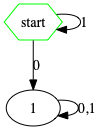

split wasn't perfect: gotta start over
lstar successful: unrolling seems equivalent to proposed automaton
equivalence checking took: 0.04850100000000168
overall guided extraction time took: 0.049501999999996826
generated counterexamples were: (format: (counterexample, counterexample generation time))



In [5]:
dfa = extract(rnn,time_limit = 50,initial_split_depth = 10,starting_examples=starting_examples)
